In [1]:
import rasterio.mask
import fnmatch
import os
import fiona

file_path_input_shp_file = 'J:\\CSE books\\4-1\\Thesis\\shapefile'
#file_path_input = 'J:\\CSE books\\4-1\\Thesis\\testdata'
file_path_input = 'C:\\Users\\acer\\Desktop\\coor'

In [2]:
for file in os.listdir(file_path_input_shp_file):
    # Reads shape file
    if file.endswith('shp'):
        file_name = file[0:4]
        print(file_path_input_shp_file+"\\"+file)
        with fiona.open(file_path_input_shp_file+'\\'+file, "r") as shapefile:
            features = [feature["geometry"] for feature in shapefile]
            
        # Store output file
        file_path_output = 'C:\\Users\\acer\\Desktop\\coor\\'+file_name+'\\Original'
        if not os.path.exists(file_path_output):
            os.makedirs(file_path_output)

        # Read all the images, filter out by .tif extension
        for file in os.listdir(file_path_input):
            if (file.endswith(".tif")==False):
                continue
            print(file)
            with rasterio.open(file_path_input+"\\"+file) as src:
                out_image, out_transform = rasterio.mask.mask(src, features, crop=True)
                out_meta = src.meta.copy()

            out_meta.update({"driver": "GTiff",
                            "height": out_image.shape[1],
                            "width": out_image.shape[2],
                            "transform": out_transform})

        # Write images by shape file
            with rasterio.open(file_path_output+"\\"+file, "w", **out_meta) as dest:
                dest.write(out_image)

J:\CSE books\4-1\Thesis\shapefile\BGD_adm0.shp
1992_modified.tif
1993_modified.tif
1994_modified.tif
1995_modified.tif
1996_modified.tif
1997_modified.tif
1998_modified.tif
1999_modified.tif
2000_modified.tif
2001_modified.tif
2002_modified.tif
2003_modified.tif
2004_modified.tif
2005_modified.tif
2006_modified.tif
2007_modified.tif
2008_modified.tif
2009_modified.tif
2010_modified.tif
2011_modified.tif
2012_modified.tif
2013_modified.tif
2014_modified.tif
2015_modified.tif
2016_modified.tif


In [3]:
file_path_output

'C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original'

In [4]:
import matplotlib.pyplot as plt
import gdal
import numpy as np

In [5]:
def read_img(path):
    ds = gdal.Open(path)
    img = np.array(ds.GetRasterBand(1).ReadAsArray())
    #print(img.dtype)
    return img

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
import gdal
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

In [7]:
dirpath = r'C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original'
outpath = r'C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\\composite'


In [8]:
search_criteria = "*.tif"

In [9]:
q = os.path.join(dirpath, search_criteria)

In [10]:
print(q)

C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\*.tif


In [11]:
dem_fps = glob.glob(q)

In [12]:
from glob import glob
all_bd = glob(q)
all_bd

['C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1992_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1993_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1994_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1995_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1996_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1997_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1998_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\1999_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\2000_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\2001_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\2002_modified.tif',
 'C:\\\\Users\\\\acer\\\\Desktop\\\\coor\\\\BGD_\\\\Original\\2003_modified.tif',
 'C:\\\\Users\\\

In [35]:
all_bd.sort()

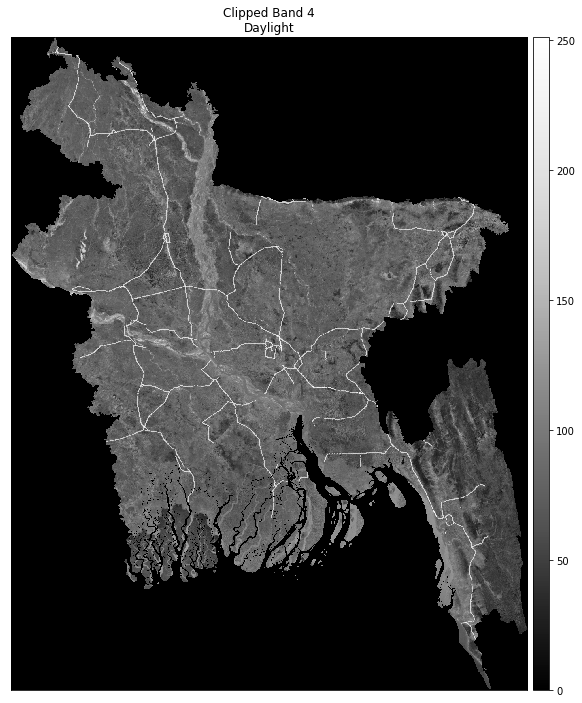

In [41]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
with rasterio.open(all_bd[0]) as src:
    daylight_band = src.read()

ep.plot_bands(daylight_band[0],
              title="Clipped Band 4\nDaylight",
              scale=False)
plt.show()

In [15]:
src_files_to_mosaic = []

In [16]:
import gdal
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os

In [17]:
for fp in all_bd:
     src = rasterio.open(fp)
     src_files_to_mosaic.append(src)

In [59]:
src_files_to_mosaic

[<open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1992_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1993_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1994_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1995_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1996_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1997_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1998_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\1999_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\2000_modified.tif' mode='r'>,
 <open DatasetReader name='C:\\Users\\acer\\Desktop\\coor\\BGD_\

In [19]:
mosaic, out_trans = merge(src_files_to_mosaic)

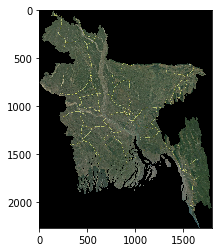

In [20]:
show(mosaic, cmap='terrain')

In [23]:
out_meta = src.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                  "height": mosaic.shape[1],
                  "width": mosaic.shape[2],
                  "transform": out_trans,
                  "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "
                  }
                 )

In [25]:
out_fp = r"C:\\Users\\acer\\Desktop\\coor\\BGD_\\Original\\composite\\daylightmerge.tif"

with rasterio.open(out_fp, "w", **out_meta) as dest:
         dest.write(mosaic)

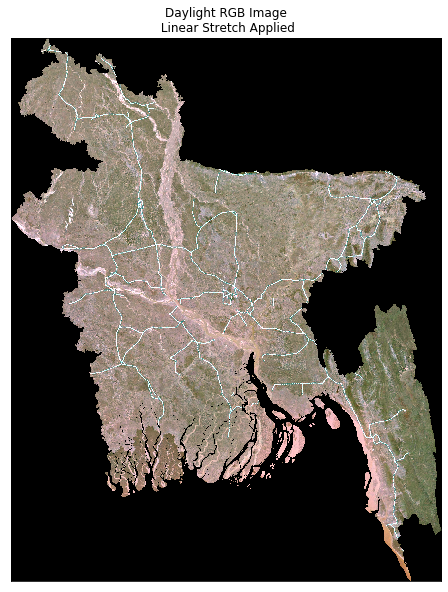

In [34]:
ep.plot_rgb(mosaic,
            rgb=[2, 1, 0],
            title="Daylight RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()

In [27]:
mosaic

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ED98AAE108>,
       dtype=object))

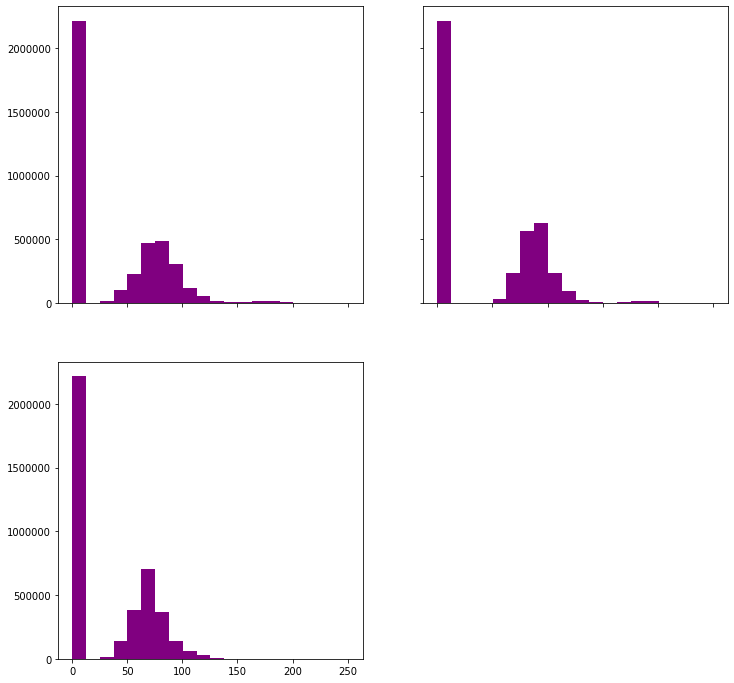

In [30]:
ep.hist(mosaic)

(<Figure size 864x864 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002ED954B7B48>,
       dtype=object))

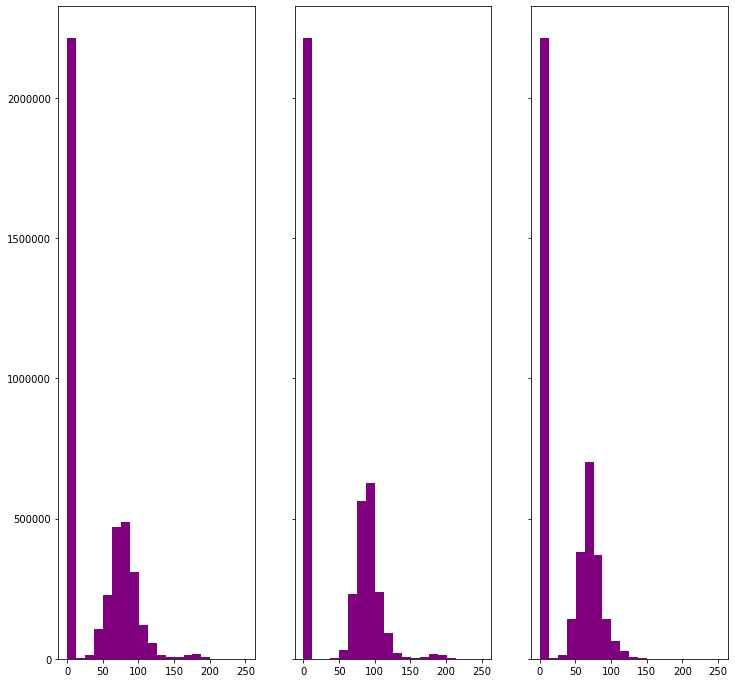

In [33]:
ep.hist(mosaic, bins=20,cols=3)